# I] Import and options


In [25]:
import pandas, numpy, seaborn
# import scipy, scipy.stats
import matplotlib, matplotlib.pyplot as plt

In [16]:
matplotlib.rcParams.update({'font.size':20, 'xtick.labelsize':20, 'ytick.labelsize':20, 
                            'axes.grid' : True, 'grid.alpha': 0.5, 'grid.linestyle' : ':',
                            'figure.figsize':(12, 8), 'svg.fonttype' : 'none'})

In [8]:
input_file_directory = '/Users/kja11/OneDrive - Háskóli Íslands/PhD ATG7//0 in_silico/Python/1)data_input/'
output_file_directory = '/Users/kja11/OneDrive - Háskóli Íslands/PhD ATG7/0 in_silico/Python/3)output/'

In [99]:
path = input_file_directory + "mef_huh7_interactome/"
path2 = output_file_directory + "ATG7/MEF/PPI/"

# II] Huh7

In [93]:
%%time
df_huh7= pandas.read_csv(path+'interact_huh7_iso1vs2.csv', sep = ",")
print(df_huh7.shape)
df_huh7.head()

(21, 9)
Wall time: 4.99 ms


,adj.pvalue,Bait,BaitBoolean,log2FC,name,Prey,PreyGene,selected,shared name
0,0.000000,NaN,False,-10.000000,DNAJB12,Q9NXW2,DJB12_HUMAN,False,DNAJB12
1,0.000000,NaN,False,10.000000,ATG12,O94817,ATG12_HUMAN,False,ATG12
2,0.003144,NaN,False,9.421296,GABARAP,O95166,GBRAP_HUMAN,False,GABARAP
3,0.000195,NaN,False,5.333772,GABARAPL2,P60520,GBRL2_HUMAN,False,GABARAPL2
4,0.002939,NaN,False,1.601515,GABARAPL1,Q9H0R8,GBRL1_HUMAN,False,GABARAPL1


In [94]:
#select columns:
df_huh7 = df_huh7[['name', 'log2FC',  'adj.pvalue']]
#rename
df_huh7 = df_huh7.rename(columns = {'adj.pvalue' : 'adj_pvalue'})
#add a small value to not have 'infinite'
df_huh7 = df_huh7.assign(adj_pvalue = df_huh7['adj_pvalue']+0.0001)
df_huh7 = df_huh7.assign(log10_pvalue = numpy.log10(1/df_huh7['adj_pvalue']))
          
#drop NAN
df_huh7 = df_huh7.dropna(axis=0)
print(len(df_huh7))

#Only keep pvalue <0.05
df_huh7 = df_huh7[df_huh7['adj_pvalue']<0.05]
print(len(df_huh7))
df_huh7.head()

21
18


,name,log2FC,adj_pvalue,log10_pvalue
0,DNAJB12,-10.000000,0.000100,4.000000
1,ATG12,10.000000,0.000100,4.000000
2,GABARAP,9.421296,0.003244,2.488862
3,GABARAPL2,5.333772,0.000295,3.529520
4,GABARAPL1,1.601515,0.003039,2.517289


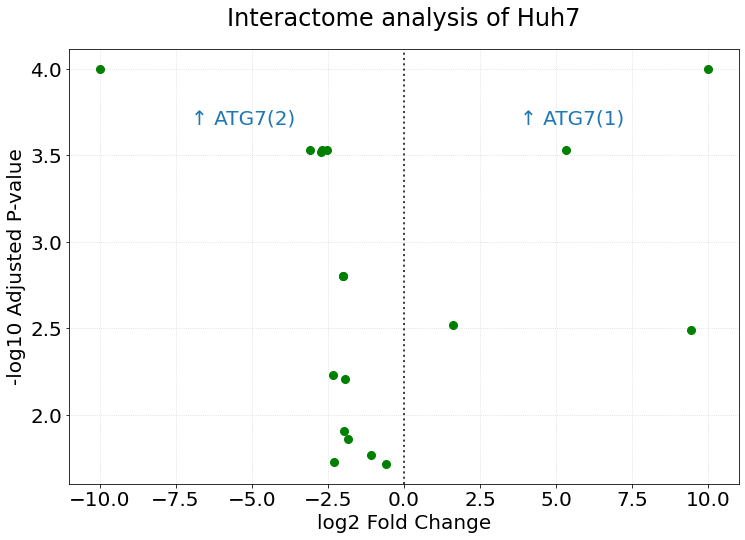

In [95]:
#Graph
x = df_huh7['log2FC']
y = df_huh7['log10_pvalue']

plt.plot(x, y, 'o',  markersize=8, color= 'green')
plt.axvline(x=0, lw=2, alpha=3/4, color='black', ls=':')
plt.text(-7, 3.68, '↑ ATG7(2)', color='tab:blue')
plt.text(3.8, 3.68, '↑ ATG7(1)', color='tab:blue')

plt.ylabel('-log10 Adjusted P-value')
plt.xlabel('log2 Fold Change')
plt.title('Interactome analysis of Huh7', y=1.04)

#save to csv
plt.savefig(path2+'HUH7_interactome_volcanoplot.svg')

In [96]:
#to know the name of the proteins from the log rank
df_huh7.set_index('name', inplace=True, drop=True)
df_huh7 = df_huh7.sort_values(['log2FC'], ascending = False)
df_huh7

,log2FC,adj_pvalue,log10_pvalue
name,,,
ATG12,10.000000,0.000100,4.000000
GABARAP,9.421296,0.003244,2.488862
GABARAPL2,5.333772,0.000295,3.529520
GABARAPL1,1.601515,0.003039,2.517289
ARFGAP1,-0.575691,0.019250,1.715559
UMPS,-1.091337,0.017074,1.767669
HK2,-1.831174,0.013833,1.859084
TMEM126A,-1.935586,0.006226,2.205814
HSPBP1,-1.973084,0.012487,1.903555


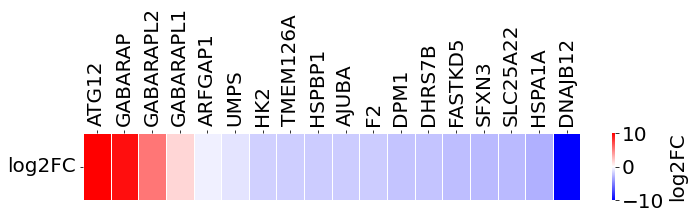

In [108]:
#Heatmap correlation
HeatMap_df =  df_huh7[['log2FC']].T

HeatMap_df = HeatMap_df.astype(float)

plt.subplots(figsize=(10,2))
plt.tight_layout()

fig = seaborn.heatmap(HeatMap_df, annot=False, cmap="bwr", linewidths=.5, center=0, vmin=-10, vmax=10,
               cbar_kws={'label': 'log2FC'})

fig.set(xlabel="", ylabel="")
fig.xaxis.tick_top()

plt.xticks(rotation = 90)
plt.yticks(rotation = 0)

#save to csv
plt.savefig(path2+'HUH7_interactome_heatmap.svg')

# III] Mefs

In [103]:
%%time
df_mef= pandas.read_csv(path+'interact_mef_iso1vs2.csv', sep = ",")
print(df_mef.shape)
df_mef.head()

(51, 11)
Wall time: 4.99 ms


,adj.pvalue,Bait,BaitBoolean,log2FC,name,NumChildren,NumDescendents,Prey,PreyGene,selected,shared name
0,0.004759,NaN,False,1.568494,Nek7,NaN,NaN,Q9ES74,NEK7_MOUSE,False,Nek7
1,0.004759,NaN,False,8.849758,Map1lc3a,NaN,NaN,Q91VR7,MLP3A_MOUSE,False,Map1lc3a
2,0.027717,NaN,False,1.052879,Atg7,NaN,NaN,Q9D906,ATG7_MOUSE,False,Atg7
3,0.002808,NaN,False,10.640435,Gabarap,NaN,NaN,Q9DCD6,GBRAP_MOUSE,False,Gabarap
4,0.000000,NaN,False,10.000000,Atg12,NaN,NaN,Q9CQY1,ATG12_MOUSE,False,Atg12


In [104]:
#select columns:
df_mef = df_mef[['name', 'log2FC',  'adj.pvalue']]
#rename
df_mef = df_mef.rename(columns = {'adj.pvalue' : 'adj_pvalue'})
#add a small value to not have 'infinite' and log10
df_mef = df_mef.assign(adj_pvalue = df_mef['adj_pvalue']+0.0001)
df_mef = df_mef.assign(log10_pvalue = numpy.log10(1/df_mef['adj_pvalue']))

#drop NAN
df_mef = df_mef.dropna(axis=0)
print(len(df_mef))

#Only keep pvalue <0.05
df_mef = df_mef[df_mef['adj_pvalue']<0.05]
print(len(df_mef))
df_mef.head()

45
41


,name,log2FC,adj_pvalue,log10_pvalue
0,Nek7,1.568494,0.004859,2.313461
1,Map1lc3a,8.849758,0.004859,2.313461
2,Atg7,1.052879,0.027817,1.555696
3,Gabarap,10.640435,0.002908,2.536442
4,Atg12,10.000000,0.000100,4.000000


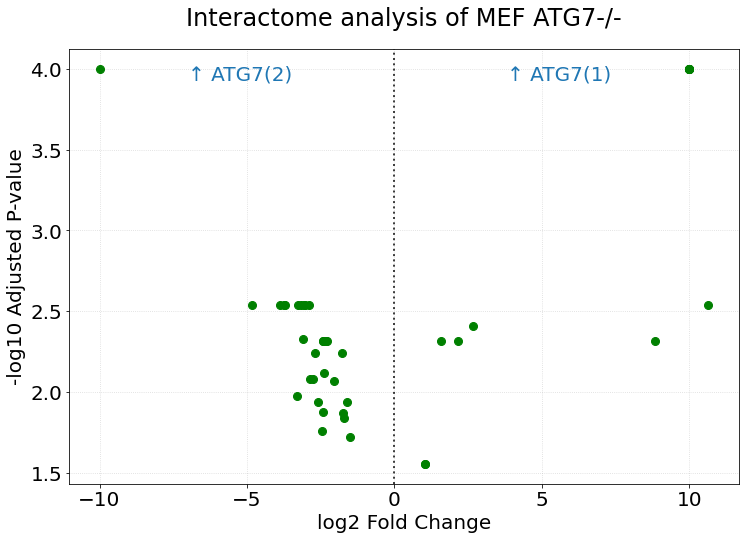

In [105]:
#Graph
x = df_mef['log2FC']
y = df_mef['log10_pvalue']

plt.plot(x, y, 'o',  markersize=8, color= 'green')
plt.axvline(x=0, lw=2, alpha=3/4, color='black', ls=':')
plt.text(-7, 3.93, '↑ ATG7(2)', color='tab:blue')
plt.text(3.8, 3.93, '↑ ATG7(1)', color='tab:blue')

plt.ylabel('-log10 Adjusted P-value')
plt.xlabel('log2 Fold Change')
plt.title('Interactome analysis of MEF ATG7-/-', y=1.04)

#save to csv
plt.savefig(path2+'MEF_interactome_volcanoplot.svg')

In [106]:
#to know the name of the proteins from the log rank
df_mef.set_index('name', inplace=True, drop=True)
df_mef = df_mef.sort_values(['log2FC'], ascending = False)
df_mef.head()

,log2FC,adj_pvalue,log10_pvalue
name,,,
Gabarap,10.640435,0.002908,2.536442
NATD1,10.000000,0.000100,4.000000
Atg12,10.000000,0.000100,4.000000
Map1lc3b,10.000000,0.000100,4.000000
Gabarapl1,10.000000,0.000100,4.000000


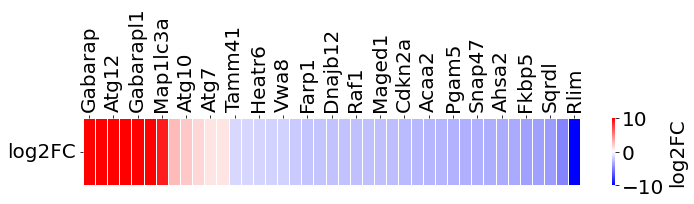

In [107]:
#Heatmap correlation
HeatMap_df =  df_mef[['log2FC']].T

HeatMap_df = HeatMap_df.astype(float)

plt.subplots(figsize=(10,2))
plt.tight_layout()

fig = seaborn.heatmap(HeatMap_df, annot=False, cmap="bwr", linewidths=.5, center=0, vmin=-10, vmax=10,
               cbar_kws={'label': 'log2FC'})

fig.set(xlabel="", ylabel="")
fig.xaxis.tick_top()

plt.xticks(rotation = 90)
plt.yticks(rotation = 0)

#save to csv
plt.savefig(path2+'MEF_interactome_heatmap.svg')